In [1]:
import os
import numpy as np
import pandas as pd

df = pd.read_parquet('output/topics.parquet')
df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
game potential,1.727143e-02,0.050379,-0.108587,-0.005561,0.070963,0.037381,-0.017120,-0.076987,-0.016807,0.027177,...,0.048419,0.021204,0.033432,0.025445,0.065939,-0.001412,-0.035499,-0.031588,-0.053256,-0.020896
graphics and performance,1.865690e-02,0.071175,-0.139749,-0.004125,0.039714,0.018735,0.018895,-0.031788,-0.015287,-0.017615,...,0.097158,0.038924,-0.003438,0.025078,0.052989,-0.038468,-0.013827,-0.020167,-0.100539,-0.070807
realism and ai,1.389513e-02,0.044250,-0.150101,0.000376,0.061845,0.043577,0.016068,-0.030539,0.000546,0.041100,...,0.098013,0.012758,0.012178,-0.036402,0.025673,0.002480,-0.030343,-0.025110,-0.073903,-0.033595
multiplayer and social features,-2.913868e-02,-0.015957,-0.125167,0.023101,0.087300,0.040456,0.019321,-0.075942,-0.004061,-0.003046,...,0.080087,-0.035763,-0.002175,-0.001014,0.007521,0.010049,-0.025355,-0.021812,-0.040727,-0.015524
customization and features,-1.402139e-02,0.012408,-0.101593,-0.009470,0.032321,-0.001662,0.009775,-0.011049,0.008714,-0.034911,...,0.115375,-0.001609,-0.002361,0.034323,0.025239,-0.025871,-0.031892,-0.008942,-0.050857,-0.055166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
controls and options,-6.102829e-07,0.017352,-0.120867,0.003254,0.079443,0.005567,0.023855,-0.031150,0.038425,-0.007778,...,0.061937,0.043260,0.026556,0.028760,0.044304,-0.014494,-0.066018,-0.028924,-0.064709,-0.062642
improved graphics,2.844666e-02,0.026912,-0.139137,-0.032575,0.043264,-0.005708,-0.001863,-0.000857,-0.011282,-0.033002,...,0.083392,0.023590,0.032113,0.021493,0.051500,-0.015685,-0.001667,0.010840,-0.069819,-0.065119
glitches,4.536155e-02,0.034008,-0.132956,-0.009675,0.081430,0.030777,0.011910,-0.044442,0.000658,-0.036857,...,0.062928,0.030875,0.023106,-0.004970,0.007902,-0.017416,-0.066296,-0.040829,-0.050152,-0.061401
scent view mechanic,-2.027834e-02,-0.015713,-0.166897,-0.046960,0.029330,-0.020280,0.011391,-0.037198,-0.007393,-0.078297,...,0.068371,0.019331,0.031182,-0.004014,0.019697,-0.000948,-0.024423,-0.033286,-0.060816,-0.017226


In [2]:
from src.embed import NomicPrefix, get_embedding

clustering_embedding = get_embedding(df.index.to_list(), NomicPrefix.CLUSTERING)
clustering_embedding

array([[ 0.01459166,  0.04871273, -0.21396875, ..., -0.05925163,
        -0.03489541,  0.01013801],
       [ 0.03678903,  0.0870726 , -0.21870439, ..., -0.02054216,
        -0.05988106, -0.02314997],
       [ 0.03868329,  0.06795368, -0.21392319, ..., -0.04314791,
        -0.04811326,  0.01438251],
       ...,
       [ 0.0574403 ,  0.06092332, -0.2167522 , ..., -0.05964067,
        -0.02200924, -0.01687473],
       [ 0.00676935,  0.00872097, -0.24667282, ..., -0.05757584,
        -0.0301925 ,  0.02280678],
       [ 0.03036754,  0.06105087, -0.20323306, ..., -0.03433095,
        -0.04811952, -0.02433388]], shape=(6520, 768))

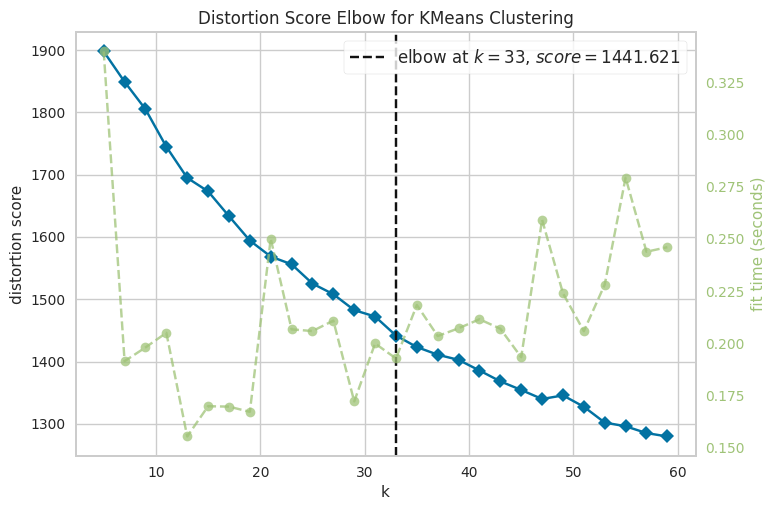

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

plt.set_loglevel('error')

model = KMeans()
visualizer = KElbowVisualizer(model, k=range(5, 60, 2))

visualizer.fit(clustering_embedding)
visualizer.show()

/home/vscode/.local/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6520 samples in 0.005s...
[t-SNE] Computed neighbors for 6520 samples in 0.236s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6520
[t-SNE] Computed conditional probabilities for sample 2000 / 6520
[t-SNE] Computed conditional probabilities for sample 3000 / 6520
[t-SNE] Computed conditional probabilities for sample 4000 / 6520
[t-SNE] Computed conditional probabilities for sample 5000 / 6520
[t-SNE] Computed conditional probabilities for sample 6000 / 6520
[t-SNE] Computed conditional probabilities for sample 6520 / 6520
[t-SNE] Mean sigma: 0.222388
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.965782
[t-SNE] KL divergence after 500 iterations: 1.583282


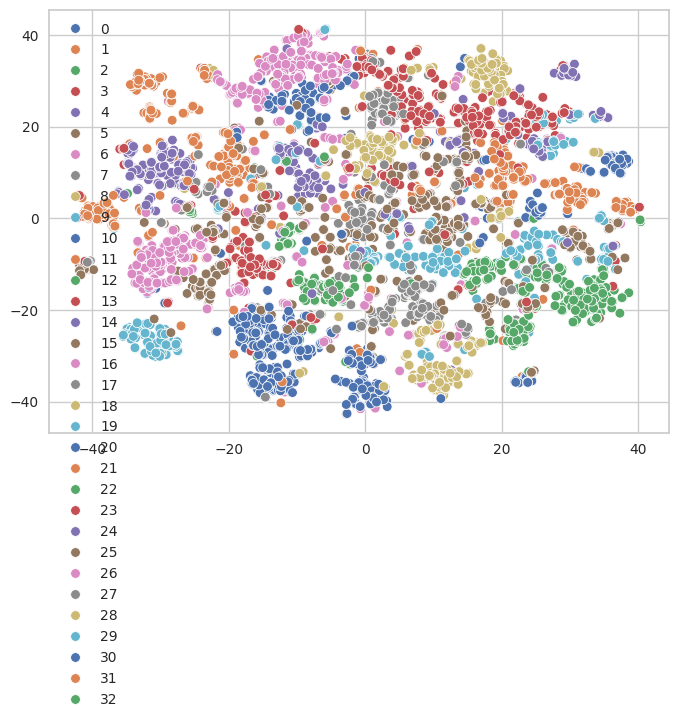

In [4]:
from sklearn.manifold import TSNE
kmeans = KMeans(n_clusters=visualizer.elbow_value_).fit_predict(clustering_embedding)
tsne = TSNE(n_components=2, verbose=1, n_iter=500).fit_transform(clustering_embedding)

sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=kmeans, palette='deep')
plt.show()

In [5]:
cluster_df = pd.DataFrame({'cluster': kmeans, 'topic': df.index})
cluster_df

,cluster,topic
0,15,game potential
1,27,graphics and performance
2,23,realism and ai
3,26,multiplayer and social features
4,4,customization and features
...,...,...
6515,28,controls and options
6516,10,improved graphics
6517,13,glitches
6518,25,scent view mechanic


In [6]:
import ollama

for cluster, topics in cluster_df.groupby('cluster')['topic']:
    print(f'Cluster {cluster}:')
    print(topics.to_list())
    
    prompt = f'Give me a name for this cluster of topics: {", ".join(topics.to_list())}. Return to me just the name of the cluster.'

    cluster_name = ollama.generate(
        model='llama3.3',
        prompt=prompt,
    )

    print(cluster_name.response)
    print()


Cluster 0:
['difficulty and learning curve', 'ease of use and learning curve', 'tutorial and onboarding', 'learning curve and complexity', 'learning curve and difficulty', 'ease of use and tutorials', 'tutorial and learning curve', 'game tutorial and guidance', 'lack of guidance and tutorials', 'tutorial and guidance', 'tutorialization and new player experience', 'learning curve and tutorials', 'tutorial and new player experience', 'controls and tutorial', 'learning curve', 'tutorial and ui issues', 'learning curve and tutorial', 'ease of use for beginners', 'ease of learning', 'need for tutorials or guidance', 'lack of tutorial', 'ease of learning and accessibility', 'lack of guidance or tutorial', 'steep learning curve', 'tutorials and guidance', 'tutorial and guidance issues', 'tutorial issues', 'lack of information and documentation', 'lack of clear instructions', 'user experience and tutorial', 'learning and discovery', 'learning curve and progression', 'tutorial and user experien